# Pandas podstawy

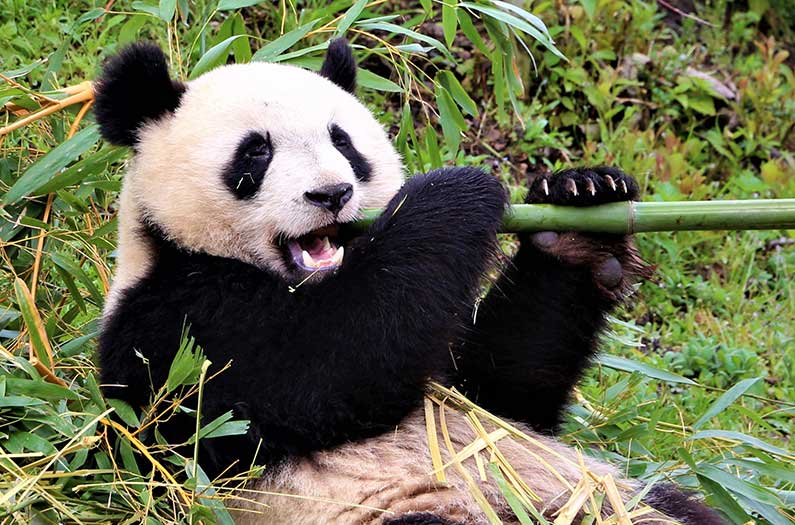


### Import Danych do notebooka

Zanim zaimportujemy jakiekolwiek dane, trzeba będzie zaimportować bibliotekę pandas. Do obróbki, czy też analizy danych w pythonie jest to jedna z najbadziej użytecznych bibliotek, a nawet mozna powiedzieć że jest to najbardziej użyteczna biblioteka - http://pandas.pydata.org/

In [2]:
#odkomentować poniższą linijkę jeżeli ktoś nie ma zainstalowanej biblioteki na komputerze w miejscu gdzie używacie tego notebooka

#pip install pandas 

In [29]:
#będziemy w tym notebooku używać tylko pandasa
import pandas as pd
print(pd.__version__) 
#sprawdzanie wersji jest dobrą praktyką --> jak komuś coś potem nie działa, powodem może być inna wersja biblioteki

1.0.5


Teraz załadujemy zbiór danych ze źródła, mianowicie strony Open San Mateo County (przykładowo):
https://data.smcgov.org/Government/Educational-Attainment/mb6a-xn89

W pandasie mamy wiele opcji do załadowywania plików, nie tylko read_json, ale też napszykład read_csv, czy też read_excel

Fajna opcja: jak potrzebujecie szybko uzyskać pomoc czy też dokumentacje o jakiejś metodzie, możecie ją wywołać ze znakiem zapytania:

In [49]:
pd.read_json?

In [10]:
pd.read_csv?

In [11]:
pd.read_excel?

In [9]:
#po znaku zapytania nie może byc zadnego innego znaku - nawet spacji

Dane zapisują się w formie tzw. "DataFrame" który jest dwu-wymiarową strukturą danych, podobną do arkusza danych, z kolumnami o różnych typach (taka zaawansowana tabelka). Pandas używa dwóch głównych struktur danych: DataFrame i Series. Seria to jednowymiarowa macierz która może przechowywać dowolny typ danych, co nie zawsze jest prawdą dla DataFrame'u (za to kolumna z DataFrame moze być traktowana jako Seria)

Pokażmy teraz pierwsze 5 i ostatnie 5 wierszy:

In [30]:
df = pd.read_json("https://data.smcgov.org/resource/mb6a-xn89.json")

In [50]:
df.head(5) #liczba w nawiasie - ilość kolumn

,geography,geography_type,year,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,location_1,:@computed_region_uph5_8hpn,:@computed_region_i2t2_cryp,geography_mapped_value,geography_mapped_value_lambda
0,Atherton,Town,2014-01-01T00:00:00.000,13.6,12.3,2.7,3.5,"{'type': 'Point', 'coordinates': [-122.2, 37.4...",2.0,28596,0,0
1,Colma,Town,2014-01-01T00:00:00.000,6.3,6.4,10.4,2.4,"{'type': 'Point', 'coordinates': [-122.455556,...",4.0,28588,0,0
2,Foster City,City,2014-01-01T00:00:00.000,11.9,9.7,2.0,2.9,"{'type': 'Point', 'coordinates': [-122.266389,...",6.0,319,1,1
3,Portola Valley,Town,2014-01-01T00:00:00.000,48.1,0.0,0.0,1.8,"{'type': 'Point', 'coordinates': [-122.218611,...",14.0,28597,0,0
4,Redwood City,City,2014-01-01T00:00:00.000,16.4,10.6,6.6,3.0,"{'type': 'Point', 'coordinates': [-122.236111,...",21.0,28607,1,1


In [32]:
df.tail(5)

,geography,geography_type,year,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,location_1,:@computed_region_uph5_8hpn,:@computed_region_i2t2_cryp
27,El Granada,CDP,2014-01-01T00:00:00.000,9.2,4.3,9.1,2.4,"{'type': 'Point', 'coordinates': [-122.473333,...",23.0,28590
28,West Menlo Park,CDP,2014-01-01T00:00:00.000,37.8,0.0,5.7,3.6,"{'type': 'Point', 'coordinates': [-122.203056,...",34.0,28595
29,Montara,CDP,2014-01-01T00:00:00.000,3.3,0.0,0.0,0.0,"{'type': 'Point', 'coordinates': [-122.506389,...",29.0,28599
30,Burlingame,City,2014-01-01T00:00:00.000,20.1,8.3,7.4,3.7,"{'type': 'Point', 'coordinates': [-122.363611,...",16.0,28587
31,La Honda,CDP,2014-01-01T00:00:00.000,0.0,0.0,11.9,0.0,"{'type': 'Point', 'coordinates': [-122.197222,...",26.0,28597


### Podstawowa analiza danych

W pandasie mamy pare bardzo przydatnych metod do szybkiego zapoznania się z ilością danych i ich najbardziej ogólnymi danymi statystycznymi (średnia, mediana, odchylenie standardowe etc)

- .shape - podobnie jak w NumPy, liczba wierszy i kolumn (zwracana jako krotka)
- .describe() - najważniejsze statystyki każdej kolumny (zakładając oczywiście że da sie je policzyć) 
- .dtypes - zwraca typ danych w danej kolumnie


In [33]:
df.shape

(32, 10)

In [34]:
df.describe()

,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,:@computed_region_uph5_8hpn,:@computed_region_i2t2_cryp
count,32.00000,32.000000,32.000000,32.000000,30.000000,32.000000
mean,17.80000,6.462500,5.946875,2.856250,17.733333,25062.093750
std,19.29944,4.693905,4.728430,1.873919,9.762466,9502.711577
min,0.00000,0.000000,0.000000,0.000000,1.000000,312.000000
25%,6.82500,1.925000,2.525000,2.100000,9.500000,28587.750000
50%,13.90000,7.750000,5.500000,3.000000,18.500000,28595.000000
75%,20.97500,9.450000,8.800000,3.600000,25.750000,28604.250000
max,100.00000,16.400000,18.500000,9.100000,34.000000,28613.000000


Jeżeli jednak chcielibyśmy dostać takie informacje o wszystkich kolumnach musimy dodać flagę "include='all'" żeby dostać statyski kolumn o typie danych nie-numercznych. Tutaj akurat musimy jescze użyć df.drop() dla kolumny 'location_1', ponieważ .describe nie akceptuje obiektów słownikowych. (też coś wyświetli, ale będzie bez sensu)

In [35]:
df.drop("location_1", axis=1).describe(include="all")

,geography,geography_type,year,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,:@computed_region_uph5_8hpn,:@computed_region_i2t2_cryp
count,32,32,32,32.00000,32.000000,32.000000,32.000000,30.000000,32.000000
unique,32,3,1,NaN,NaN,NaN,NaN,NaN,NaN
top,East Palo Alto,City,2014-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,15,32,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,17.80000,6.462500,5.946875,2.856250,17.733333,25062.093750
std,NaN,NaN,NaN,19.29944,4.693905,4.728430,1.873919,9.762466,9502.711577
min,NaN,NaN,NaN,0.00000,0.000000,0.000000,0.000000,1.000000,312.000000
25%,NaN,NaN,NaN,6.82500,1.925000,2.525000,2.100000,9.500000,28587.750000
50%,NaN,NaN,NaN,13.90000,7.750000,5.500000,3.000000,18.500000,28595.000000
75%,NaN,NaN,NaN,20.97500,9.450000,8.800000,3.600000,25.750000,28604.250000


In [36]:
df.dtypes

geography                              object
geography_type                         object
year                                   object
less_than_high_school_graduate        float64
high_school_graduate                  float64
some_college_or_associate_s_degree    float64
bachelor_s_degree_or_higher           float64
location_1                             object
:@computed_region_uph5_8hpn           float64
:@computed_region_i2t2_cryp             int64
dtype: object

Dodatkowe przydatne bardzo metody dla DataFrame:
- .mean(axis=0) - zwraca średnią statystyczną dla kolumn
- .median(axis=0) - zwraca medianę statystyczną dla kolumn
- .mode(axis=0) - zwraca modę statystyczną dla kolumn (najczęściej występująca)
- .count() - ilość wartości w kolumnie
- .unique() - zwraca macierz jednowymiarową wszystkich unikalnych elementów kolumny
- .value_counts() - zwraca obiekt zawierający ilość występowań unikalnych wartości

In [52]:
#dodać notatke o odnoszeniu sie do kolumn
df.bachelor_s_degree_or_higher.mode()

0    0.0
dtype: float64

In [37]:
df.geography.count()

32

In [38]:
df.geography_type.unique()

array(['Town', 'City', 'CDP'], dtype=object)

In [39]:
df.less_than_high_school_graduate.value_counts()

0.0      4
14.2     1
8.5      1
7.0      1
100.0    1
9.5      1
11.9     1
4.8      1
31.1     1
26.7     1
6.2      1
15.7     1
22.1     1
16.4     1
6.3      1
44.4     1
20.9     1
7.7      1
9.2      1
37.8     1
3.3      1
15.1     1
48.1     1
18.3     1
21.2     1
16.1     1
13.6     1
13.4     1
20.1     1
Name: less_than_high_school_graduate, dtype: int64

### Funkcje do transformacji danych

Często jest tak że będziemy chcieli przekształcić nasz zbiór danych, czy też jego jakąś część/kolumne. Bardzo prosto robi się to w pandasie za pomocą metody .apply(). W tym przypadku zmapujemy wartości w kolumnie 'geography_type' jako 1 lub 0 w zależności od wartości w kolumnie. Dodamy te wartości jako nową kolumne w naszym DataFrame.



In [42]:
def mapGeography(x):
    if x == "City":
        return 1
    else:
        return 0

In [43]:
df.geography_type.value_counts()

City    15
CDP     12
Town     5
Name: geography_type, dtype: int64

In [54]:
df['geography_mapped_value'] = df.geography_type.apply(mapGeography)
#tworzymy nową kolumnę o nazwie w nawiasach kwadratowych - jej wartości będą opowiadały zadziałaniu funkcji w .apply() na zapisaną wcześniej kolumnę

In [45]:
df.geography_mapped_value.value_counts()

0    17
1    15
Name: geography_mapped_value, dtype: int64

Dla uproszczenia, jako że akurat ta funkcja jest bardzo prosta, zadziała to także dla funkcji lambda:

In [56]:
funkcja = lambda y: 1 if y == "City" else 0
df['geography_mapped_value_lambda'] = df.geography_type.apply(funkcja)

In [57]:
df.geography_mapped_value_lambda.value_counts()

0    17
1    15
Name: geography_mapped_value_lambda, dtype: int64

Źródło z którego wziąłem notebooka (i tylko lekko go zmieniłem): https://dev.socrata.com/blog/2016/02/01/pandas-and-jupyter-notebook.html

In [55]:
f = lambda x,y: x+1-y
f(1,2)

0